<a href="https://colab.research.google.com/github/saipriyapola/Condition-Based-Monitoring-/blob/main/Project_1_by_Group_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving naval_vessel.csv to naval_vessel.csv


In [ ]:
path = 'naval_vessel.csv'
data = pd.read_csv(path)

In [ ]:
data.head()

,Lever position,Ship speed,Gas Turbine (GT) shaft torque,GT rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,Port Propeller Torque,Hight Pressure (HP) Turbine exit temperature,GT Compressor inlet air temperature,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor inlet air pressure,GT Compressor outlet air pressure,GT exhaust gas pressure,Turbine Injecton Control,Fuel flow,GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,288,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [ ]:
data.tail()

,Lever position,Ship speed,Gas Turbine (GT) shaft torque,GT rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,Port Propeller Torque,Hight Pressure (HP) Turbine exit temperature,GT Compressor inlet air temperature,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor inlet air pressure,GT Compressor outlet air pressure,GT exhaust gas pressure,Turbine Injecton Control,Fuel flow,GT Compressor decay state coefficient,GT Turbine decay state coefficient
11929,5.140,15,21624.934,1924.342,8470.013,175.239,175.239,681.658,288,628.950,2.087,0.998,10.990,1.027,23.803,0.471,1.0,1.0
11930,6.175,18,29763.213,2306.745,8800.352,245.954,245.954,747.405,288,658.853,2.512,0.998,13.109,1.031,32.671,0.647,1.0,1.0
11931,7.148,21,39003.867,2678.052,9120.889,332.389,332.389,796.457,288,680.393,2.982,0.998,15.420,1.036,42.104,0.834,1.0,1.0
11932,8.206,24,50992.579,3087.434,9300.274,438.024,438.024,892.945,288,722.029,3.594,0.998,18.293,1.043,58.064,1.149,1.0,1.0
11933,9.300,27,72775.130,3560.400,9742.950,644.880,644.880,1038.411,288,767.595,4.531,0.998,22.464,1.052,86.067,1.704,1.0,1.0


In [ ]:
data.shape

(11934, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Lever position                                11934 non-null  float64
 1   Ship speed                                    11934 non-null  int64  
 2   Gas Turbine (GT) shaft torque                 11934 non-null  float64
 3   GT rate of revolutions                        11934 non-null  float64
 4   Gas Generator rate of revolutions             11934 non-null  float64
 5   Starboard Propeller Torque                    11934 non-null  float64
 6   Port Propeller Torque                         11934 non-null  float64
 7   Hight Pressure (HP) Turbine exit temperature  11934 non-null  float64
 8   GT Compressor inlet air temperature           11934 non-null  int64  
 9   GT Compressor outlet air temperature          11934 non-null 

In [ ]:
data.duplicated().value_counts()

False    11934
dtype: int64

In [ ]:
data.describe()

,Lever position,Ship speed,Gas Turbine (GT) shaft torque,GT rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,Port Propeller Torque,Hight Pressure (HP) Turbine exit temperature,GT Compressor inlet air temperature,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor inlet air pressure,GT Compressor outlet air pressure,GT exhaust gas pressure,Turbine Injecton Control,Fuel flow,GT Compressor decay state coefficient,GT Turbine decay state coefficient
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.166667,15.000000,27247.498685,2136.289256,8200.947312,227.335768,227.335768,735.495446,288.0,646.215331,2.352963,9.980000e-01,12.297123,1.029474,33.641261,0.662440,0.97500,0.9875
std,2.626388,7.746291,22148.613155,774.083881,1091.315507,200.495889,200.495889,173.680552,0.0,72.675882,1.084770,2.220539e-16,5.337448,0.010390,25.841363,0.507132,0.01472,0.0075
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,288.0,540.442000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750
25%,3.144000,9.000000,8375.883750,1386.758000,7058.324000,60.317000,60.317000,589.872750,288.0,578.092250,1.389000,9.980000e-01,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810
50%,5.140000,15.000000,21630.659000,1924.326000,8482.081500,175.268000,175.268000,706.038000,288.0,637.141500,2.083000,9.980000e-01,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875
75%,7.148000,21.000000,39001.426750,2678.079000,9132.606000,332.364750,332.364750,834.066250,288.0,693.924500,2.981000,9.980000e-01,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000


In [ ]:
df=data.drop(['GT Compressor inlet air temperature','GT Compressor inlet air pressure'],axis=1)
df.head()

,Lever position,Ship speed,Gas Turbine (GT) shaft torque,GT rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,Port Propeller Torque,Hight Pressure (HP) Turbine exit temperature,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor outlet air pressure,GT exhaust gas pressure,Turbine Injecton Control,Fuel flow,GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,550.563,1.096,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,581.658,1.331,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,587.587,1.389,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,613.851,1.658,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,645.642,2.078,11.197,1.026,26.373,0.522,0.95,0.975


In [ ]:
for i in range(df.shape[1]):
  print(df.iloc[:,i].unique())
  print(df.iloc[:,i].value_counts())

[1.138 2.088 3.144 4.161 5.14  6.175 7.148 8.206 9.3  ]
1.138    1326
2.088    1326
3.144    1326
4.161    1326
5.140    1326
6.175    1326
7.148    1326
8.206    1326
9.300    1326
Name: Lever position, dtype: int64
[ 3  6  9 12 15 18 21 24 27]
3     1326
6     1326
9     1326
12    1326
15    1326
18    1326
21    1326
24    1326
27    1326
Name: Ship speed, dtype: int64
[  289.964  6960.18   8379.229 ... 39003.867 50992.579 72775.13 ]
50992.960    4
29795.666    3
50993.539    3
29794.302    3
14724.277    3
            ..
3217.569     1
8377.653     1
21631.744    1
29785.708    1
72775.130    1
Name: Gas Turbine (GT) shaft torque, Length: 11430, dtype: int64
[1349.489 1376.166 1386.757 ... 1344.618 1406.601 1345.441]
2678.078    68
2678.077    60
2678.076    55
2678.075    55
1547.465    49
            ..
1350.077     1
1342.223     1
1351.813     1
2306.910     1
1345.441     1
Name: GT rate of revolutions, Length: 3888, dtype: int64
[6677.38  6828.469 7111.811 ... 9120.889 9300.

In [ ]:
df.columns

Index(['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque',
       'GT rate of revolutions', 'Gas Generator rate of revolutions',
       'Starboard Propeller Torque', 'Port Propeller Torque',
       'Hight Pressure (HP) Turbine exit temperature',
       'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
       'GT Compressor outlet air pressure', 'GT exhaust gas pressure',
       'Turbine Injecton Control', 'Fuel flow',
       'GT Compressor decay state coefficient',
       'GT Turbine decay state coefficient '],
      dtype='object')

In [ ]:
df.columns.isna().sum()

0

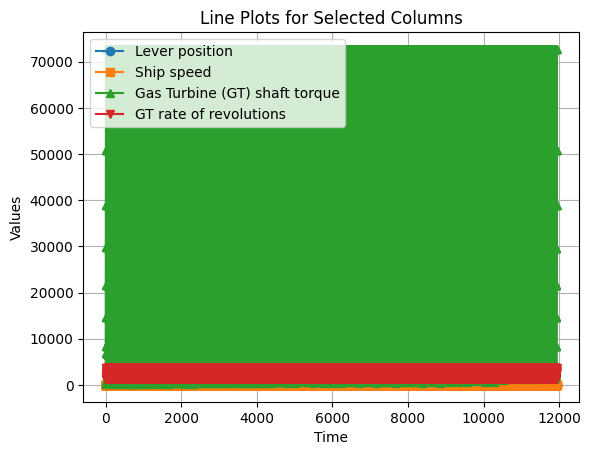

<Figure size 1600x1600 with 0 Axes>

In [ ]:
plt.plot(df['Lever position'], label='Lever position', marker='o')
plt.plot(df['Ship speed'], label='Ship speed', marker='s')
plt.plot(df['Gas Turbine (GT) shaft torque'], label='Gas Turbine (GT) shaft torque', marker='^')
plt.plot(df['GT rate of revolutions'], label='GT rate of revolutions', marker='v')

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Line Plots for Selected Columns')
plt.legend()
plt.grid(True)
plt.figure(figsize=(16,16))
plt.show()

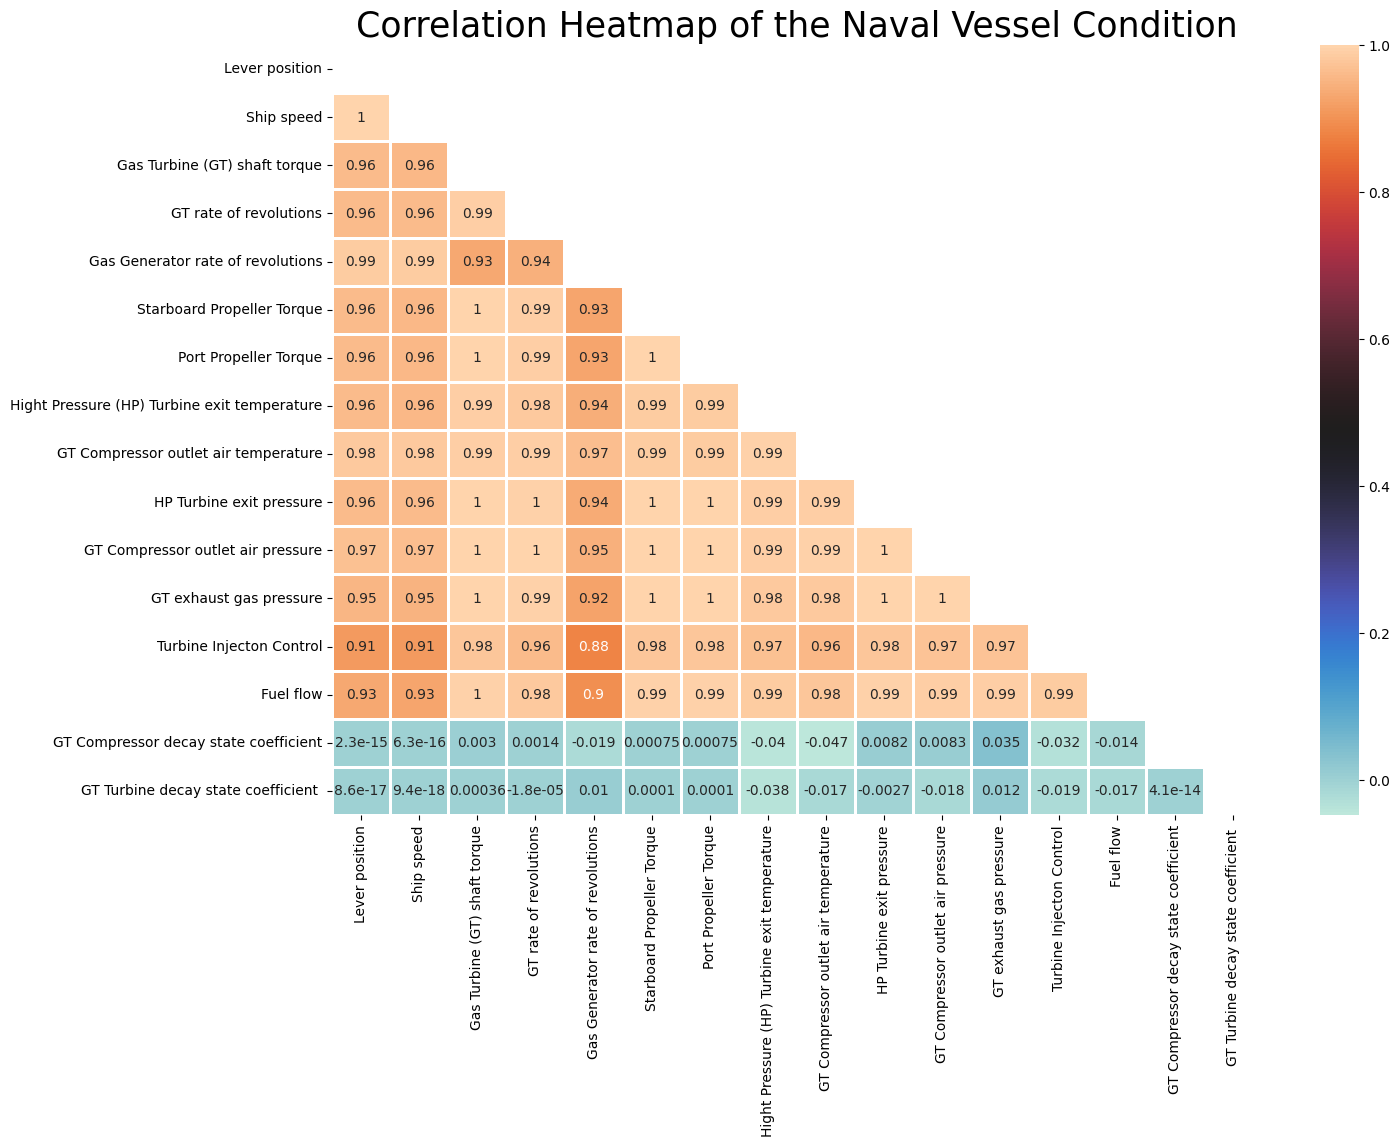

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))

title = 'Correlation Heatmap of the Naval Vessel Condition'
plt.title(title,fontsize = 25)

mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), cbar = True, cmap = 'icefire', annot = True, linewidth = 1, ax = ax, mask = mask)

plt.show()

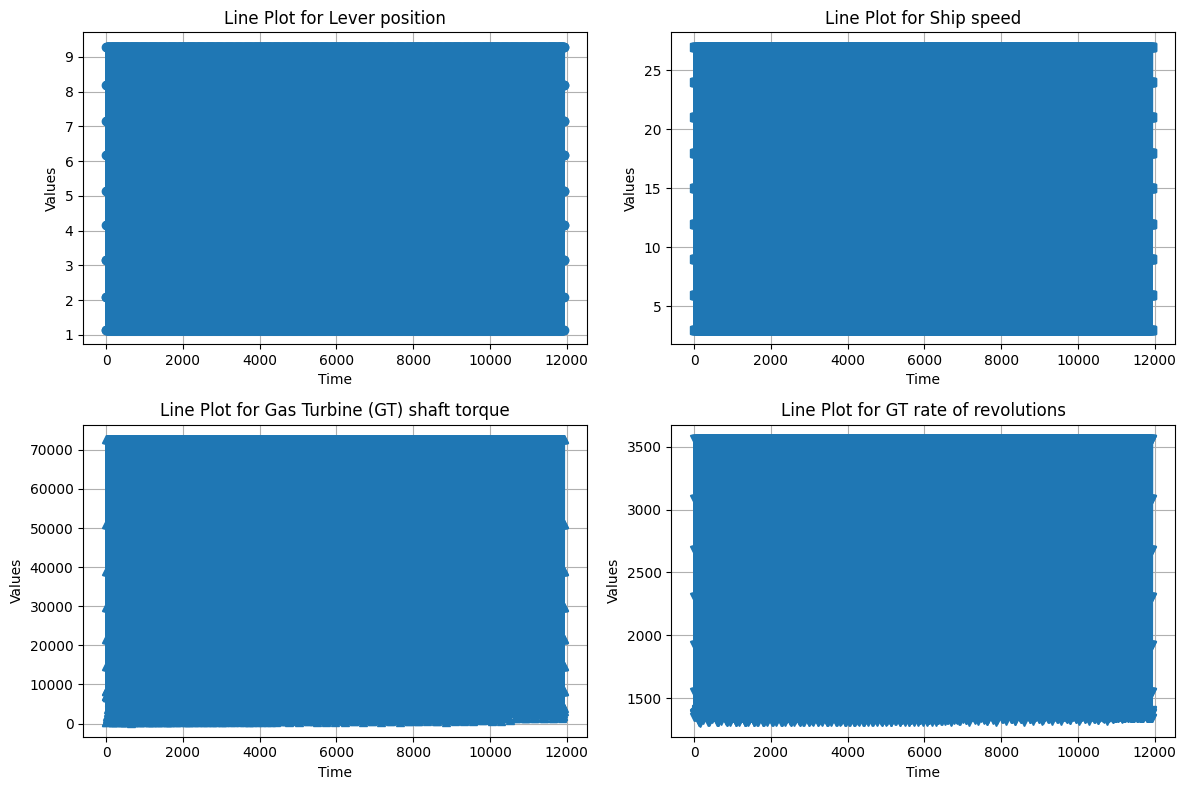

In [ ]:
path = 'naval_vessel.csv'
data = pd.read_csv(path)

# Create separate line plots for each column
plt.figure(figsize=(12, 8))
# Plot 'Lever position'
plt.subplot(2, 2, 1)
plt.plot(data['Lever position'], label='Lever position', marker='o')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Line Plot for Lever position')
plt.grid(True)

# Plot 'Ship speed'
plt.subplot(2, 2, 2)
plt.plot(data['Ship speed'], label='Ship speed', marker='s')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Line Plot for Ship speed')
plt.grid(True)

# Plot 'Gas Turbine (GT) shaft torque'
plt.subplot(2, 2, 3)
plt.plot(data['Gas Turbine (GT) shaft torque'], label='Gas Turbine (GT) shaft torque', marker='^')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Line Plot for Gas Turbine (GT) shaft torque')
plt.grid(True)

# Plot 'GT rate of revolutions'
plt.subplot(2, 2, 4)
plt.plot(data['GT rate of revolutions'], label='GT rate of revolutions', marker='v')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Line Plot for GT rate of revolutions')
plt.grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


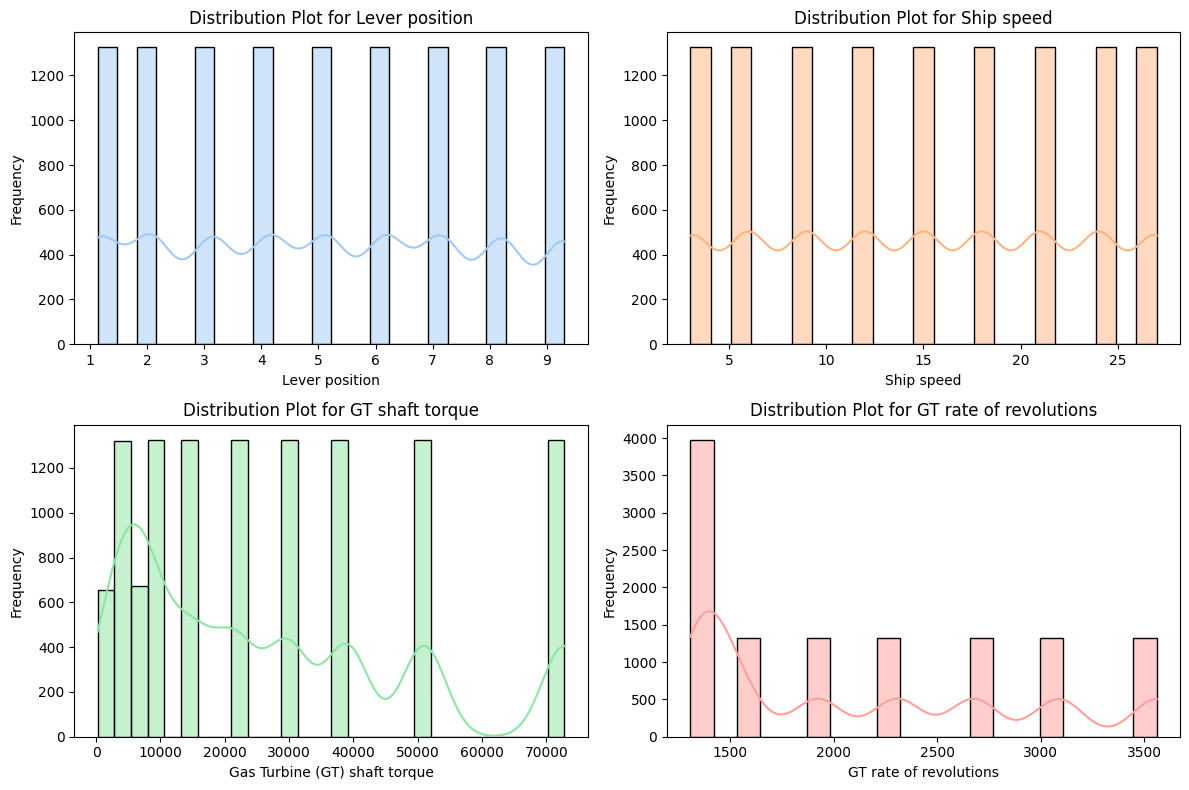

In [ ]:
path = 'naval_vessel.csv'
data = pd.read_csv(path)

custom_palette = sns.color_palette("pastel")

plt.figure(figsize=(12, 8))

# Plot 'Lever position'
plt.subplot(2, 2, 1)
sns.histplot(data=data, x='Lever position', kde=True, color=custom_palette[0])
plt.xlabel('Lever position')
plt.ylabel('Frequency')
plt.title('Distribution Plot for Lever position')

# Plot 'Ship speed'
plt.subplot(2, 2, 2)
sns.histplot(data=data, x='Ship speed', kde=True, color=custom_palette[1])
plt.xlabel('Ship speed')
plt.ylabel('Frequency')
plt.title('Distribution Plot for Ship speed')

# Plot 'Gas Turbine (GT) shaft torque'
plt.subplot(2, 2, 3)
sns.histplot(data=data, x='Gas Turbine (GT) shaft torque', kde=True, color=custom_palette[2])
plt.xlabel('Gas Turbine (GT) shaft torque')
plt.ylabel('Frequency')
plt.title('Distribution Plot for GT shaft torque')

# Plot 'GT rate of revolutions'
plt.subplot(2, 2, 4)
sns.histplot(data=data, x='GT rate of revolutions', kde=True, color=custom_palette[3])
plt.xlabel('GT rate of revolutions')
plt.ylabel('Frequency')
plt.title('Distribution Plot for GT rate of revolutions')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


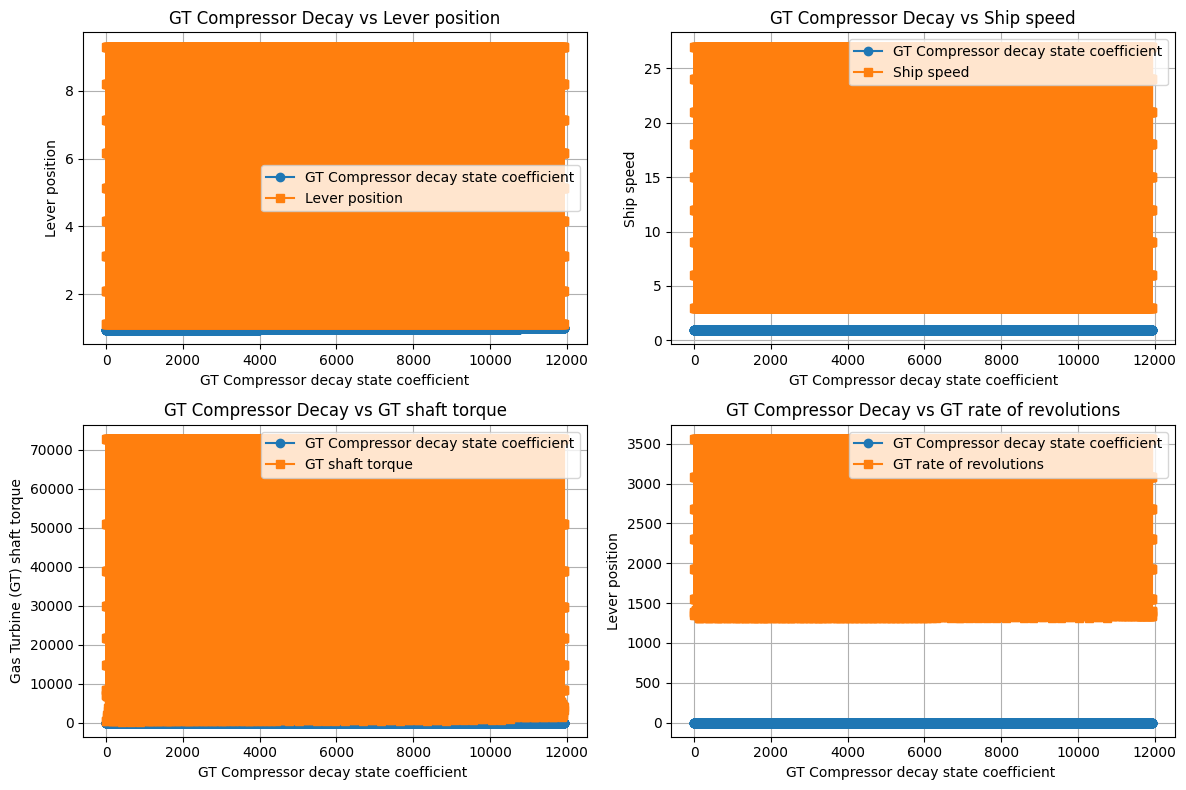

In [ ]:
path = 'naval_vessel.csv'
data = pd.read_csv(path)

# Create time series plots for each pair of variables
plt.figure(figsize=(12, 8))

# Plot 'GT Compressor decay state coefficient' vs 'Lever position'
plt.subplot(2, 2, 1)  # Create a 2x2 grid of plots, select the first plot
plt.plot( data['GT Compressor decay state coefficient'], marker='o', linestyle='-', label='GT Compressor decay state coefficient')
plt.plot( data['Lever position'], marker='s', linestyle='-', label='Lever position')
plt.xlabel('GT Compressor decay state coefficient')
plt.ylabel('Lever position')
plt.title('GT Compressor Decay vs Lever position')
plt.legend()
plt.grid(True)

# Plot 'GT Compressor decay state coefficient' vs 'Ship speed'
plt.subplot(2, 2, 2)  # Select the second plot
plt.plot( data['GT Compressor decay state coefficient'], marker='o', linestyle='-', label='GT Compressor decay state coefficient')
plt.plot( data['Ship speed'], marker='s', linestyle='-', label='Ship speed')
plt.xlabel('GT Compressor decay state coefficient')
plt.ylabel('Ship speed')
plt.title('GT Compressor Decay vs Ship speed')
plt.legend()
plt.grid(True)

# Plot 'GT Compressor decay state coefficient' vs 'GT shaft torque'
plt.subplot(2, 2, 3)  # Select the third plot
plt.plot( data['GT Compressor decay state coefficient'], marker='o', linestyle='-', label='GT Compressor decay state coefficient')
plt.plot( data['Gas Turbine (GT) shaft torque'], marker='s', linestyle='-', label='GT shaft torque')
plt.xlabel('GT Compressor decay state coefficient ')
plt.ylabel('Gas Turbine (GT) shaft torque')
plt.title('GT Compressor Decay vs GT shaft torque')
plt.legend()
plt.grid(True)

# Plot 'GT Compressor decay state coefficient' vs 'GT rate of revolutions'
plt.subplot(2, 2, 4)  # Select the fourth plot
plt.plot( data['GT Compressor decay state coefficient'], marker='o', linestyle='-', label='GT Compressor decay state coefficient')
plt.plot( data['GT rate of revolutions'], marker='s', linestyle='-', label='GT rate of revolutions')
plt.xlabel('GT Compressor decay state coefficient ')
plt.ylabel('Lever position')
plt.title('GT Compressor Decay vs GT rate of revolutions')
plt.legend()
plt.grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
import pandas as pd

column_to_drop = 'GT Turbine decay state coefficient'
if column_to_drop in df.columns:
    X = df.drop(['GT Compressor decay state coefficient', column_to_drop, 'index'], axis=1)
else:
    X = df.drop(['GT Compressor decay state coefficient'], axis=1)

y = df['GT Compressor decay state coefficient']

Algorithms

1.linear regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7757, 15)
(4177, 15)
(7757,)
(4177,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lm.predict(X_test)
print('Coeffiecients: \n',lm.coef_)

Coeffiecients: 
 [ 2.62760315e-01 -6.71982546e-02  2.17392942e-05  7.55546661e-05
  8.16945021e-05 -1.82752060e-03 -1.82752060e-03 -1.09595049e-03
 -3.10398348e-03  3.15333922e-01 -7.16493636e-02  2.21349269e+00
 -1.11069326e-03  7.97184899e-01 -1.59401392e+00]


In [ ]:
print("Coefficients: \n", lm.coef_)

Coefficients: 
 [ 2.62760315e-01 -6.71982546e-02  2.17392942e-05  7.55546661e-05
  8.16945021e-05 -1.82752060e-03 -1.82752060e-03 -1.09595049e-03
 -3.10398348e-03  3.15333922e-01 -7.16493636e-02  2.21349269e+00
 -1.11069326e-03  7.97184899e-01 -1.59401392e+00]


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alpha = 1.0
ridge_model = Ridge(alpha=alpha)

ridge_model.fit(X_train_scaled, y_train)

y_pred = ridge_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))
print("Mean absolute error:",mean_absolute_error(y_test,y_pred))

Mean Squared Error: 4.158407627531254e-05
Coefficient of determination: 0.81
Mean absolute error: 0.005330545023275487


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alpha = 1.0
ridge_model = Ridge(alpha=alpha)

ridge_model.fit(X_train_scaled, y_train)

y_pred = ridge_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))
print("mean absolute error:", mean_absolute_error(y_test,y_pred))

Mean Squared Error: 4.5451689084243905e-05
Coefficient of determination: 0.79
mean absolute error: 0.0055669291418321346


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alpha = 1.0
ridge_model = Ridge(alpha=alpha)

ridge_model.fit(X_train_scaled, y_train)

y_pred = ridge_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))
print("Mean absolute error:", mean_absolute_error(y_test,y_pred))

Mean Squared Error: 4.227286673457058e-05
Coefficient of determination: 0.80
Mean absolute error: 0.005380441753540078


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alpha = 1.0
ridge_model = Ridge(alpha=alpha)

ridge_model.fit(X_train_scaled, y_train)

y_pred = ridge_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))
print("Mean absolute error:", mean_absolute_error(y_test,y_pred))

Mean Squared Error: 4.359181667562624e-05
Coefficient of determination: 0.80
Mean absolute error: 0.005472464953731873


2.Decision Tree Regressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9547, 15)
(2387, 15)
(9547,)
(2387,)


In [ ]:
from sklearn.tree import DecisionTreeRegressor

#Define model. Specify a number for random_state to ensure same results each run
grade_model = DecisionTreeRegressor(random_state=1,criterion='poisson',max_depth=10)

#Fit model
grade_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=10, random_state=1)

In [ ]:
pred=grade_model.predict(X_test)
print(pred)

[0.98525    0.95711397 0.968      ... 0.96585714 0.966      0.95727483]


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
max_depth = 10
tree_model = DecisionTreeRegressor(max_depth=max_depth)
tree_model.fit(X_train, y_train)

pred = tree_model.predict(X_test)
mse = mean_squared_error(y_test,pred)

print(f'Mean Squared Error: {mse}')
print("Coefficient of determination: %.2f" % r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))

Mean Squared Error: 2.5980556546411586e-05
Coefficient of determination: 0.88
Mean absolute error: 0.003350796971146076


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
max_depth = 10
tree_model = DecisionTreeRegressor(max_depth=max_depth)
tree_model.fit(X_train, y_train)

pred = tree_model.predict(X_test)
mse = mean_squared_error(y_test,pred)

print(f'Mean Squared Error: {mse}')
print("Coefficient of determination: %.2f" % r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))

Mean Squared Error: 2.6807773147518252e-05
Coefficient of determination: 0.87
Mean absolute error: 0.003385017122494279


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=50)
max_depth = 10
tree_model = DecisionTreeRegressor(max_depth=max_depth)
tree_model.fit(X_train, y_train)

pred = tree_model.predict(X_test)
mse = mean_squared_error(y_test,pred)

print(f'Mean Squared Error: {mse}')
print("Coefficient of determination: %.2f" % r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))

Mean Squared Error: 2.8273472181152043e-05
Coefficient of determination: 0.87
Mean absolute error: 0.003484467349432042


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
max_depth = 10
tree_model = DecisionTreeRegressor(max_depth=max_depth)
tree_model.fit(X_train, y_train)

pred = tree_model.predict(X_test)
mse = mean_squared_error(y_test,pred)

print(f'Mean Squared Error: {mse}')
print("Coefficient of determination: %.2f" % r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))

Mean Squared Error: 2.710143180530342e-05
Coefficient of determination: 0.87
Mean absolute error: 0.003396177607567614


3.Random Forest Regressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9547, 15)
(2387, 15)
(9547,)
(2387,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest_model = RandomForestRegressor(random_state=1)

In [ ]:
forest_model.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [ ]:
preds=forest_model.predict(X_test)
print(preds)

[0.98478 0.95993 0.96862 ... 0.9678  0.96535 0.96012]


In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(y_test,preds))
print("Coefficient of determination: %.2f" % r2_score(y_test,preds))

Mean squared error: 0.00
Coefficient of determination: 1.00


In [ ]:
print(mean_absolute_error(y_test,preds))

0.0003982949308755747


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
n_estimators = 100
max_depth = None
min_samples_split = 2
min_samples_leaf = 1

rf_model = RandomForestRegressor(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    random_state=42
)

rf_model.fit(X_train, y_train)

preds = rf_model.predict(X_test)

mse = mean_squared_error(y_test, preds)

print(f'Mean Squared Error: {mse}')
print("Coefficient of determination: %.2f" % r2_score(y_test,preds))
print("Mean absolute error:",mean_absolute_error(y_test,preds))

Mean Squared Error: 4.6798454126516027e-07
Coefficient of determination: 1.00
Mean absolute error: 0.0004226518642647511


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
n_estimators = 100
max_depth = None
min_samples_split = 2
min_samples_leaf = 1

rf_model = RandomForestRegressor(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    random_state=42
)

rf_model.fit(X_train, y_train)

preds = rf_model.predict(X_test)

mse = mean_squared_error(y_test, preds)

print(f'Mean Squared Error: {mse}')
print("Coefficient of determination: %.2f" % r2_score(y_test,preds))
print("Mean absolute error:",mean_absolute_error(y_test,preds))

Mean Squared Error: 5.1932952412864e-07
Coefficient of determination: 1.00
Mean absolute error: 0.00044542560321713125


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
n_estimators = 100
max_depth = None
min_samples_split = 2
min_samples_leaf = 1

rf_model = RandomForestRegressor(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    random_state=42
)

rf_model.fit(X_train, y_train)

preds = rf_model.predict(X_test)

mse = mean_squared_error(y_test, preds)

print(f'Mean Squared Error: {mse}')
print("Coefficient of determination: %.2f" % r2_score(y_test,preds))
print("Mean absolute error:",mean_absolute_error(y_test,preds))

Mean Squared Error: 5.86914269757019e-07
Coefficient of determination: 1.00
Mean absolute error: 0.00047232058084333256


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
n_estimators = 100
max_depth = None
min_samples_split = 2
min_samples_leaf = 1

rf_model = RandomForestRegressor(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    random_state=42
)

rf_model.fit(X_train, y_train)

preds = rf_model.predict(X_test)

mse = mean_squared_error(y_test, preds)

print(f'Mean Squared Error: {mse}')
print("Coefficient of determination: %.2f" % r2_score(y_test,preds))
print("Mean absolute error:",mean_absolute_error(y_test,preds))

Mean Squared Error: 5.691139573856341e-07
Coefficient of determination: 1.00
Mean absolute error: 0.0004785539861144228


4.Support Vector Regressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
from sklearn.svm import SVR
svr_model = SVR(C=100, kernel='poly')
svr_model.fit(X_train,y_train)
preds=svr_model.predict(X_test)
print(preds)
print("Mean squared error: %.2f" % mean_squared_error(y_test,preds))
print("Coefficient of determination: %.2f" % r2_score(y_test,preds))
print(mean_absolute_error(y_test,preds))

[0.975 0.975 0.975 ... 0.975 0.975 0.975]
Mean squared error: 0.00
Coefficient of determination: -0.00
0.01267368925065838


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
from sklearn.svm import SVR
svr_model = SVR(kernel='poly')
svr_model.fit(X_train,y_train)
preds=svr_model.predict(X_test)
print(preds)
print("Mean squared error: %.2f" % mean_squared_error(y_test,preds))
print("Coefficient of determination: %.2f" % r2_score(y_test,preds))
print(mean_absolute_error(y_test,preds))

[0.975 0.975 0.975 ... 0.975 0.975 0.975]
Mean squared error: 0.00
Coefficient of determination: -0.00
0.012626005361930308


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
from sklearn.svm import SVR
svr_model = SVR(kernel='poly')
svr_model.fit(X_train,y_train)
preds=svr_model.predict(X_test)
print(preds)
print("Mean squared error: %.2f" % mean_squared_error(y_test,preds))
print("Coefficient of determination: %.2f" % r2_score(y_test,preds))
print(mean_absolute_error(y_test,preds))

[0.975 0.975 0.975 ... 0.975 0.975 0.975]
Mean squared error: 0.00
Coefficient of determination: -0.00
0.012671320860094959


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=50)
from sklearn.svm import SVR
svr_model = SVR(kernel='poly')
svr_model.fit(X_train,y_train)
preds=svr_model.predict(X_test)
print(preds)
print("Mean squared error: %.2f" % mean_squared_error(y_test,preds))
print("Coefficient of determination: %.2f" % r2_score(y_test,preds))
print(mean_absolute_error(y_test,preds))

[0.975 0.975 0.975 ... 0.975 0.975 0.975]
Mean squared error: 0.00
Coefficient of determination: -0.00
0.01267368925065838


5.K-Neighbors Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


n_neighbors = 10

knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)

knn_model.fit(X_train_scaled, y_train)

preds = knn_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, preds)

print(f'Mean Squared Error: {mse}')
print("Coefficient of determination: %.2f" % r2_score(y_test,preds))
print("Mean absolute error:",mean_absolute_error(y_test,preds))

Mean Squared Error: 1.99429116045245e-05
Coefficient of determination: 0.91
Mean absolute error: 0.0026573523250942627


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


n_neighbors = 10

knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)

knn_model.fit(X_train_scaled, y_train)

preds = knn_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, preds)

print(f'Mean Squared Error: {mse}')
print("Coefficient of determination: %.2f" % r2_score(y_test,preds))
print("Mean absolute error:",mean_absolute_error(y_test,preds))

Mean Squared Error: 2.3494666294331224e-05
Coefficient of determination: 0.89
Mean absolute error: 0.003116280368612124


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


n_neighbors = 10

knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)

knn_model.fit(X_train_scaled, y_train)

preds = knn_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, preds)

print(f'Mean Squared Error: {mse}')
print("Coefficient of determination: %.2f" % r2_score(y_test,preds))
print("Mean absolute error:",mean_absolute_error(y_test,preds))

Mean Squared Error: 2.2078049597855226e-05
Coefficient of determination: 0.90
Mean absolute error: 0.00290281501340483


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


n_neighbors = 100

knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)

knn_model.fit(X_train_scaled, y_train)

preds = knn_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, preds)

print(f'Mean Squared Error: {mse}')
print("Coefficient of determination: %.2f" % r2_score(y_test,preds))
print("Mean absolute error:",mean_absolute_error(y_test,preds))

Mean Squared Error: 0.00015001921553746726
Coefficient of determination: 0.31
Mean absolute error: 0.010248764663634191
